In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

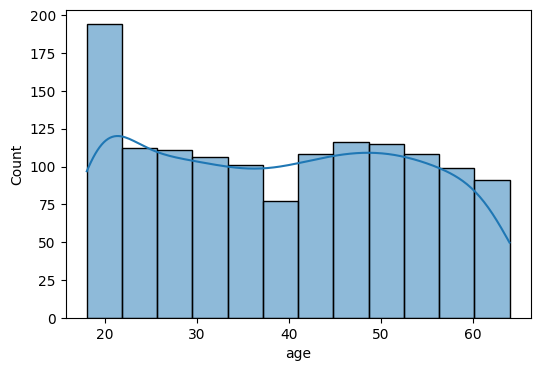

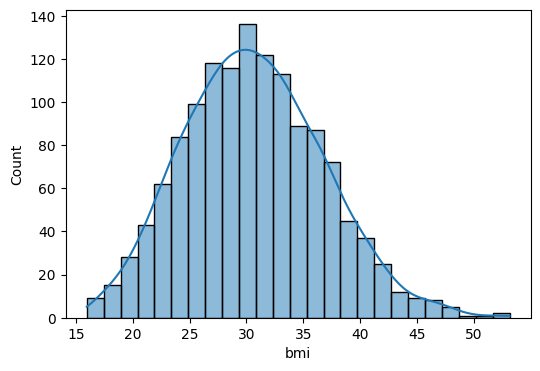

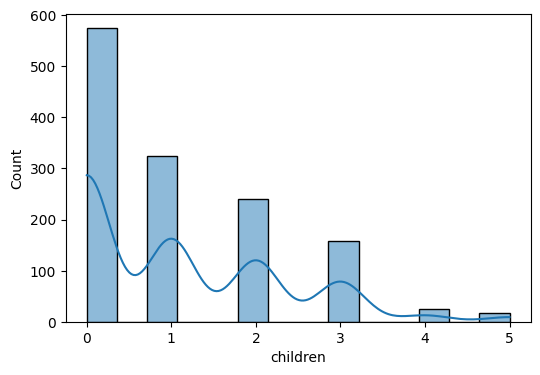

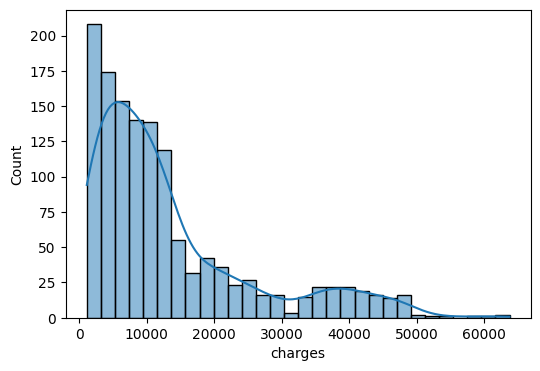

In [10]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde = True)

<Axes: xlabel='children', ylabel='count'>

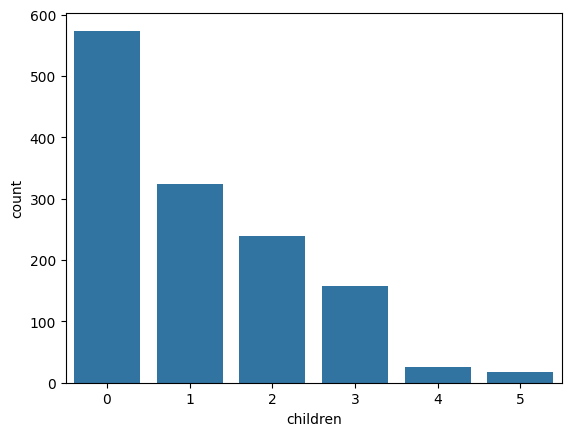

In [11]:
sns.countplot(x = df["children"])

<Axes: xlabel='sex', ylabel='count'>

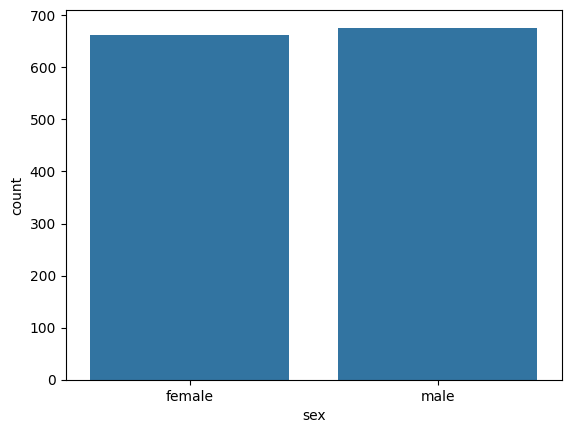

In [12]:
sns.countplot(x = df["sex"])

<Axes: xlabel='smoker', ylabel='count'>

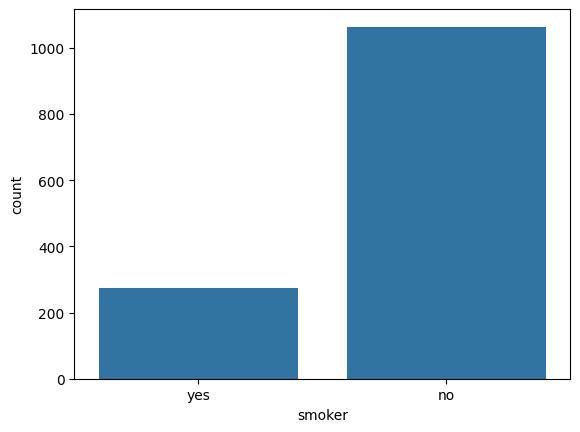

In [13]:
sns.countplot(x = df["smoker"])

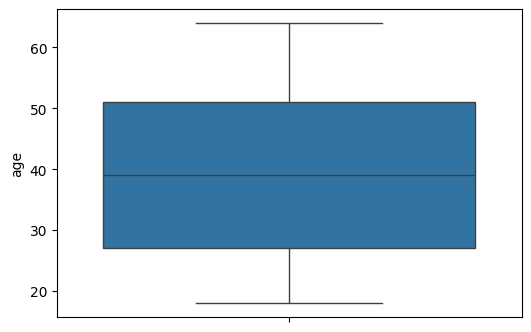

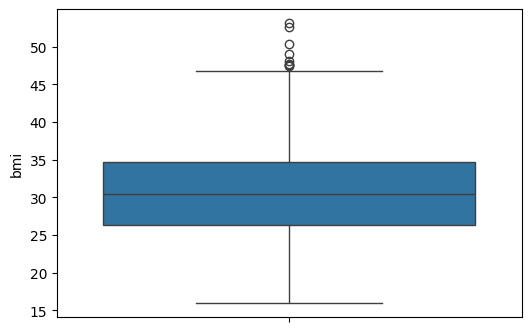

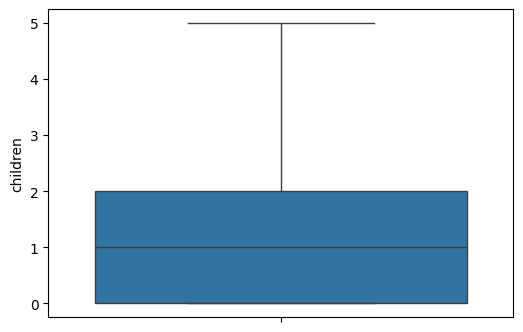

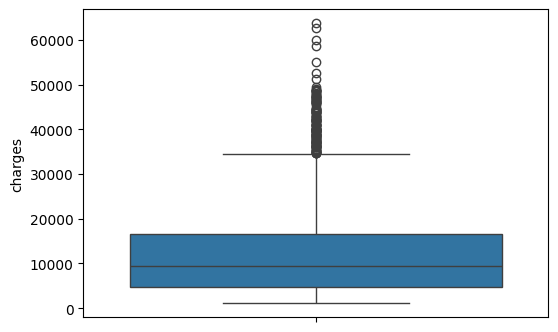

In [14]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])

<Axes: >

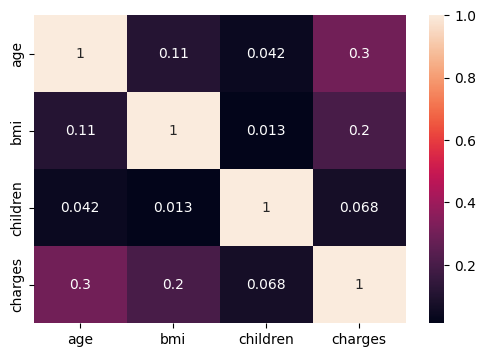

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Data Cleaning and Preprocessing

In [16]:
df_cleaned = df.copy()

In [17]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [19]:
df_cleaned["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [20]:
df_cleaned["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [21]:
df_cleaned["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [22]:
df_cleaned["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### Encoding

In [23]:
df_cleaned["sex"] =  df_cleaned["sex"].map({
    "male": 0, 
    "female": 1
})

In [24]:
df_cleaned["smoker"] =  df_cleaned["smoker"].map({
    "no": 0,
    "yes": 1
})

In [25]:
df_cleaned.rename(columns={
    "sex":"gender",
    "smoker":"cancerStick"
}, inplace = True)

In [27]:
df_cleaned = pd.get_dummies(df_cleaned, columns=["region"])

In [28]:
df_cleaned.head()

,age,gender,bmi,children,cancerStick,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [29]:
df_cleaned = df_cleaned.astype(int)

In [30]:
df_cleaned

,age,gender,bmi,children,cancerStick,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,0,1,0,0
1334,18,1,31,0,0,2205,1,0,0,0
1335,18,1,36,0,0,1629,0,0,1,0
1336,21,1,25,0,0,2007,0,0,0,1


### Feature Engineering and extractions

<Axes: xlabel='bmi', ylabel='Count'>

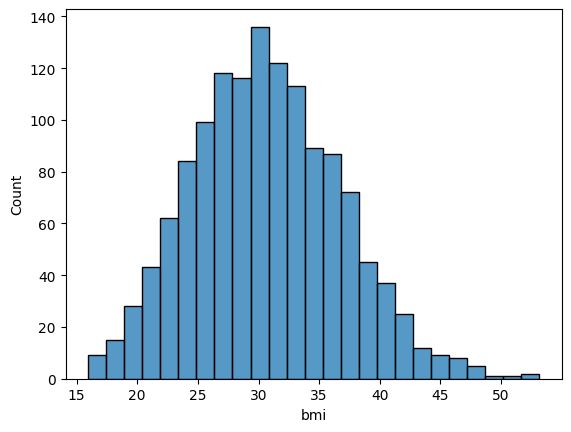

In [32]:
sns.histplot(df["bmi"])

In [34]:
df_cleaned["bmi_category"] = pd.cut(
    df_cleaned["bmi"], 
    bins=[0, 18.5, 24.9,29.9, float("inf")],
    labels=["underweight", "normal", "overweight", "obese"]
)

In [35]:
df_cleaned

,age,gender,bmi,children,cancerStick,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,0,1,overweight
1,18,0,33,1,0,1725,0,0,1,0,obese
2,28,0,33,3,0,4449,0,0,1,0,obese
3,33,0,22,0,0,21984,0,1,0,0,normal
4,32,0,28,0,0,3866,0,1,0,0,overweight
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,0,1,0,0,obese
1334,18,1,31,0,0,2205,1,0,0,0,obese
1335,18,1,36,0,0,1629,0,0,1,0,obese
1336,21,1,25,0,0,2007,0,0,0,1,overweight


In [36]:
df_cleaned = pd.get_dummies(df_cleaned, columns=["bmi_category"])

In [37]:
df_cleaned = df_cleaned.astype(int)

In [38]:
df_cleaned.head()

,age,gender,bmi,children,cancerStick,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_underweight,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,0,1,0,0,1,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,0,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,0,22,0,0,21984,0,1,0,0,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,0,1,0


### Feature Scaling

In [39]:
df_cleaned.columns

Index(['age', 'gender', 'bmi', 'children', 'cancerStick', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_underweight', 'bmi_category_normal',
       'bmi_category_overweight', 'bmi_category_obese'],
      dtype='object')

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = ["age", "bmi", "children"]

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [42]:
df_cleaned

,age,gender,bmi,children,cancerStick,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_underweight,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,-1.438764,1,-0.518122,-0.908614,1,16884,0,0,0,1,0,0,1,0
1,-1.509965,0,0.462657,-0.078767,0,1725,0,0,1,0,0,0,0,1
2,-0.797954,0,0.462657,1.580926,0,4449,0,0,1,0,0,0,0,1
3,-0.441948,0,-1.335438,-0.908614,0,21984,0,1,0,0,0,1,0,0
4,-0.513149,0,-0.354659,-0.908614,0,3866,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0,-0.027733,1.580926,0,10600,0,1,0,0,0,0,0,1
1334,-1.509965,1,0.135731,-0.908614,0,2205,1,0,0,0,0,0,0,1
1335,-1.509965,1,0.953046,-0.908614,0,1629,0,0,1,0,0,0,0,1
1336,-1.296362,1,-0.845048,-0.908614,0,2007,0,0,0,1,0,0,1,0


In [43]:
df_cleaned.columns

Index(['age', 'gender', 'bmi', 'children', 'cancerStick', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_underweight', 'bmi_category_normal',
       'bmi_category_overweight', 'bmi_category_obese'],
      dtype='object')

In [ ]:
desired_order = [
    'age', 'gender', 'bmi', 'children', 'cancerStick',
    'region_northeast', 'region_northwest', 'region_southeast',
    'region_southwest', 'bmi_category_underweight', 'bmi_category_normal',
    'bmi_category_overweight', 'bmi_category_obese', 'charges'
]

df_cleaned = df_cleaned[desired_order]

In [46]:
df_cleaned.head()

,age,gender,bmi,children,cancerStick,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_underweight,bmi_category_normal,bmi_category_overweight,bmi_category_obese,charges
0,-1.438764,1,-0.518122,-0.908614,1,0,0,0,1,0,0,1,0,16884
1,-1.509965,0,0.462657,-0.078767,0,0,0,1,0,0,0,0,1,1725
2,-0.797954,0,0.462657,1.580926,0,0,0,1,0,0,0,0,1,4449
3,-0.441948,0,-1.335438,-0.908614,0,0,1,0,0,0,1,0,0,21984
4,-0.513149,0,-0.354659,-0.908614,0,0,1,0,0,0,0,1,0,3866


In [49]:
correlation_with_charges = df_cleaned.corr(method='pearson')['charges'].sort_values(ascending=False)

In [ ]:
correlation_with_charges 

charges                     1.000000
cancerStick                 0.787251
age                         0.299009
bmi_category_obese          0.199533
bmi                         0.196188
region_southeast            0.073981
children                    0.067999
region_northeast            0.006350
region_northwest           -0.039905
region_southwest           -0.043210
bmi_category_underweight   -0.050484
gender                     -0.057293
bmi_category_normal        -0.103679
bmi_category_overweight    -0.120084
Name: charges, dtype: float64

In [51]:
df_cleaned.columns

Index(['age', 'gender', 'bmi', 'children', 'cancerStick', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_underweight', 'bmi_category_normal',
       'bmi_category_overweight', 'bmi_category_obese', 'charges'],
      dtype='object')

In [54]:
import pandas as pd
from scipy.stats import chi2_contingency

# Bin charges into 3 categories
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=3, labels=['low', 'medium', 'high'])

cat_features = [
    'gender','cancerStick','region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_normal','bmi_category_overweight', 'bmi_category_obese'
]

# List to hold results 
results = []

# Loop to apply Chi-Square test
for feature in cat_features:
    contingency_table = pd.crosstab(df_cleaned[feature], df_cleaned['charges_bin'])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    results.append({
        'Feature': feature,
        'Chi-Square Statistic': round(chi2, 3),
        'p-value': round(p, 3),
        'Significant': p < 0.05
    })

# Convert results to DataFrame for better display
results_df = pd.DataFrame(results)

In [ ]:
results_df

,Feature,Chi-Square Statistic,p-value,Significant
0,gender,1.979,0.372,False
1,cancerStick,689.120,0.000,True
2,region_northwest,1.618,0.445,False
3,region_southeast,7.299,0.026,True
4,region_southwest,5.714,0.057,False
5,bmi_category_normal,1.897,0.387,False
6,bmi_category_overweight,2.279,0.320,False
7,bmi_category_obese,4.397,0.111,False


In [ ]:
results_df["Feature"].

0                     gender
1                cancerStick
2           region_northwest
3           region_southeast
4           region_southwest
5        bmi_category_normal
6    bmi_category_overweight
7         bmi_category_obese
Name: Feature, dtype: object

In [61]:
final_df = df_cleaned[["gender", "cancerStick", "region_northwest", "region_southeast", "region_southwest", "bmi_category_normal", "bmi_category_overweight", "bmi_category_obese", "charges"]]

In [62]:
final_df

,gender,cancerStick,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese,charges
0,1,1,0,0,1,0,1,0,16884
1,0,0,0,1,0,0,0,1,1725
2,0,0,0,1,0,0,0,1,4449
3,0,0,1,0,0,1,0,0,21984
4,0,0,1,0,0,0,1,0,3866
...,...,...,...,...,...,...,...,...,...
1333,0,0,1,0,0,0,0,1,10600
1334,1,0,0,0,0,0,0,1,2205
1335,1,0,0,1,0,0,0,1,1629
1336,1,0,0,0,1,0,1,0,2007
